# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
import scipy.stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
import os
os.getcwd()

'C:\\Users\\andre\\OneDrive\\Desktop\\Springboard\\Frequentist Case Study'

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ These statistics are definitely being skewed by the people who had extremely high charges.

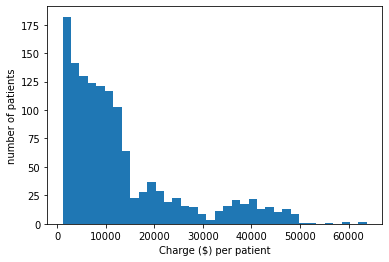

In [5]:
_ = plt.hist(medical['charges'], bins = 36)
_ = plt.xlabel('Charge ($) per patient')
_ = plt.ylabel('number of patients')
plt.show()

In [6]:
# estimate the population mean
mean = np.mean(medical['charges'])
print("The estimated population mean: $" , mean)


The estimated population mean: $ 13270.422265141257


In [7]:
# estimate the population standard deviation
standard_dev = np.std(medical['charges'],ddof=1)
print("The estimated population standard deviation: $" ,standard_dev)

The estimated population standard deviation: $ 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__  We have enough data to bootstrap and find a one sided confidence interval to be confident the value of the mean is above $12000 95% of the time.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one-sided test is appropriate because the manager is only concerned with the coverage falling below $12000, not being extremely high.

In [8]:
def patient_sampler(n):
    return np.random.choice(medical['charges'], n)

In [9]:
seed(40)
# calculate mean charges from a sample of 1000, 10000 times
dist_of_mean = np.empty(10000)
for i in range(10000):
    dist_of_mean[i] = np.mean(patient_sampler(1000))
distribution_df=pd.DataFrame(dist_of_mean)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

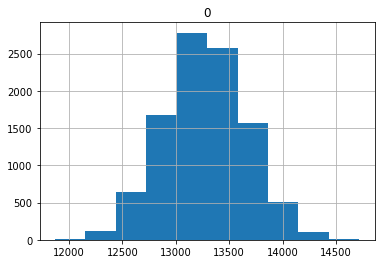

In [10]:
distribution_df.hist()

In [11]:
distribution_df.mean(),distribution_df.std()

(0    13274.868517
 dtype: float64,
 0    383.77686
 dtype: float64)

In [12]:
#Calculate the (95%) margin of error (use the t statistic)
t_statistic = t.ppf(.975,999)
sample_size = 999
margin_of_error = standard_dev / np.sqrt(sample_size) * t_statistic
print("The margin of error:" , margin_of_error)

The margin of error: 751.8589639211838


In [13]:
#Calculate the 95% Confidence Interval of the mean
mean = int(distribution_df.mean())
upper_bound = mean + margin_of_error
lower_bound = mean - margin_of_error
print('The 95% confidence interval is between', lower_bound, "and" , upper_bound, "which does not include $12000.  So the administrator does not need to be concerned.")

The 95% confidence interval is between 12522.141036078816 and 14025.858963921184 which does not include $12000.  So the administrator does not need to be concerned.


In [14]:
#Two other ways to extract the confidence interval
(int(distribution_df.quantile(0.025)), int(distribution_df.quantile(0.975)))

(12535, 14025)

In [15]:
np.quantile(distribution_df,0.025), np.quantile(distribution_df,0.975)

(12535.006247814024, 14025.151682898975)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ 
Null: Insured and uninsured patients are charged the same.

Alternative: Insured and unisured patients are charged differently.

We are assuming the variances are the same.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [16]:
medical.groupby('insuranceclaim')['charges'].mean()

insuranceclaim
0     8821.421892
1    16423.928277
Name: charges, dtype: float64

In [17]:
#create dataframe of just insured changes
insured_df = medical[medical['insuranceclaim'] == 1]['charges']
print('The mean and standard deviation for an insured patient charges are', insured_df.mean(),'and' ,insured_df.std())

The mean and standard deviation for an insured patient charges are 16423.928276537663 and 14045.928418802127


In [18]:
#create dataframe of just uninsured charnges
uninsured_df = medical[medical['insuranceclaim'] == 0]['charges']
print('The mean and standard deviation for an uninsured patient charges are', uninsured_df.mean(),'and', uninsured_df.std())

The mean and standard deviation for an uninsured patient charges are 8821.421892306294 and 6446.510126811736


In [19]:
#run t-test
scipy.stats.ttest_ind(insured_df, uninsured_df)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [20]:
#pooled standard deviation by hand
insured_ss = len(insured_df)
uninsured_ss = len(uninsured_df)
insured_std = insured_df.std()
uninsured_std = uninsured_df.std()

pooled_std = np.sqrt((((insured_ss-1)*insured_std**2+(uninsured_ss-1)*uninsured_std**2))/(insured_ss + uninsured_ss - 2))
pooled_std

11520.034268775256

In [21]:
#t-test statistic by hand
insured_mean = insured_df.mean()
uninsured_mean = uninsured_df.mean()

t_test_statistic = (insured_mean - uninsured_mean) / (pooled_std*np.sqrt(1/insured_ss + 1/uninsured_ss))
print(t_test_statistic, "is the t-test statistic, which matches the one calculated by scipy")

11.89329903087671 is the t-test statistic, which matches the one calculated by scipy


Because the p-value < .001, we have enough evidence to reject the null hypothesis and conclude that there is a statistically significant difference between the charges for insured and uninsured patients, as the administrator suggested.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, there is no z-test.  With a large enough sample size, the z-test and t-test will have the same results.  For small sample sizes, you should use a t-test.  So no need for a z-test!

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test

Could I have done bootstrapping and confidence intervals to reject the null??

In [22]:
def patient_sampler(data, n):
    return np.random.choice(data, n)

In [23]:
seed(41)
# calculate difference of mean charges from a sample of 1000, 10000 times
dist_of_mean_diff = np.empty(10000)
for i in range(10000):
    dist_of_mean_diff[i] = np.mean(patient_sampler(insured_df,1000))-np.mean(patient_sampler(uninsured_df,1000))
distribution_diff_df=pd.DataFrame(dist_of_mean_diff)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

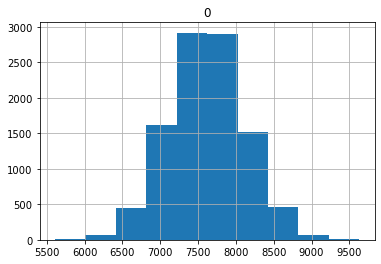

In [24]:
#histogram of the difference of the means between insured and uninsured
distribution_diff_df.hist()

In [25]:
#mean difference between insured and uninsured after 10000 trials of 1000 samples each
distribution_diff_df.mean()

0    7614.042125
dtype: float64

In [26]:
#Calculate the (95%) margin of error (use the t statistic)
t_statistic = t.ppf(.975,999)
sample_size = 999
margin_of_error = standard_dev / np.sqrt(sample_size) * t_statistic
print("The margin of error:" , margin_of_error)

The margin of error: 751.8589639211838


In [27]:
#Calculate the 95% Confidence Interval of the mean
mean = int(distribution_diff_df.mean())
upper_bound = mean + margin_of_error
lower_bound = mean - margin_of_error
print('The 95% confidence interval is between', lower_bound, "and" , upper_bound, "which does not include $0.")

The 95% confidence interval is between 6862.141036078816 and 8365.858963921184 which does not include $0.


Because the confidence interval does not include 0, we have enough evidence to reject the null hypothesis and conclude that there is a statistically significant difference between the charges for insured and uninsured patients, as the administrator suggested.